In [442]:
import pandas as pd
import numpy as np
import logging
from sklearn import preprocessing
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [443]:
logger_file = 'ACO_logger.txt'

logging.basicConfig(filename=logger_file, format='%(asctime)s %(message)s', filemode='w')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [444]:
distances_matrix= [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ]

normalised_distance = preprocessing.normalize(distances_matrix)
normalised_distance


array([[0.        , 0.40949172, 0.11912183, 0.17007857, 0.27249327,
        0.22955595, 0.40230766, 0.03558618, 0.42954028, 0.14618738,
        0.23724123, 0.35836791, 0.32946458],
       [0.47793166, 0.        , 0.3402655 , 0.29717171, 0.16204048,
        0.24179325, 0.18699978, 0.50620587, 0.07858281, 0.30984635,
        0.26792252, 0.06961306, 0.11290185],
       [0.17285057, 0.4230354 , 0.        , 0.08606164, 0.22303299,
        0.19466901, 0.42109598, 0.20630552, 0.45042967, 0.06351592,
        0.22788153, 0.35224667, 0.30545823],
       [0.26846201, 0.40190186, 0.09361887, 0.        , 0.18460059,
        0.22732245, 0.36788261, 0.2961521 , 0.41772477, 0.12289125,
        0.27848318, 0.33755537, 0.26028684],
       [0.46914349, 0.23903019, 0.2646303 , 0.20134914, 0.        ,
        0.1907064 , 0.2936821 , 0.50883804, 0.2729719 , 0.22896273,
        0.25283699, 0.16855799, 0.10671504],
       [0.34639047, 0.31260857, 0.20243926, 0.21731338, 0.16714475,
        0.        , 0.42378

In [445]:
nodes = np.arange(len(distances_matrix))
node_connections = {}
for node in nodes: 
    node_connections[node] = []
    for index, connection in enumerate(distances_matrix[node]):
        if connection != 0: 
            node_connections[node].append(index)
            
node_connections

{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 1: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 2: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 3: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 4: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12],
 5: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12],
 6: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12],
 7: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12],
 8: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12],
 9: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
 10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12],
 11: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
 12: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [446]:
pheromone_matrix = np.ones(np.shape(distances_matrix))*statistics.mean([statistics.mean(row) for row in normalised_distance])
pheromone_matrix

array([[0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809],
       [0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809],
       [0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809],
       [0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809],
       [0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232809, 0.24232809],
       [0.24232809, 0.24232809, 0.24232809, 0.24232809, 0.24232809,
        0.24232809, 0.24232

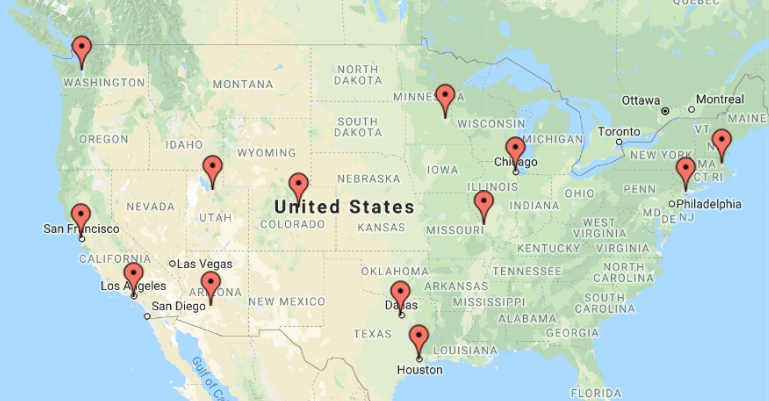
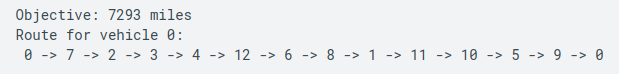

In [447]:
K = 15 # number of ants 
E = 0.997 # evapoartion rate
Q = 5 # pheromone laying rate 
A = 5 # pheremone weight
B = 1 # distance weight / route visibility 

STOP = 2000
REWARD_SHORTEST = True
RANDOMISE_START = False
LOG = False
FOLDS = 1

In [448]:
#! EDITS ideas 
#change so each ant must take a different route 
#only reward ants that find a shorter path, not just all of them

ploting_data = {
    'score_per_epoch' : {'x' :[], 'y' :[]},
    'best_score' : {'x' :[], 'y' :[]}
}

iteration = 0
iteration_since_last_improvement = 0
shortest_length = 100000
best_path = []
iteration_where_best_path = 0
best_ant_this_epoch = K*2

def pick_node(node : int, visited_nodes_tracker : list) -> int: 
    
    p_dict = {}
    possible_nodes = [x for x in node_connections[node] if x not in visited_nodes_tracker]
    denominator =  sum([(pheromone_matrix[node][x]**A)*(normalised_distance[node][x]**B) for x in possible_nodes])
    
    for p_node in possible_nodes:
        pheromone = pheromone_matrix[node][p_node]
        distance = normalised_distance[node][p_node]

        p = ((pheromone**A)*(distance**B)) / denominator
        p_dict[p_node] = p 
            
    node_picker = np.random.random()
    sum_of_p = 0
    for node in p_dict.keys():
        sum_of_p += p_dict[node]
        if node_picker < sum_of_p:
            return node
        
def evapourate_pheromone() -> None:
    for row in pheromone_matrix:
        for node in nodes: 
            new_p = row[node] * E
            if new_p > 0.00001:
                row[node] = new_p
            else: 
                row[node] = 0.00001
                

def lay_pheromone(ant : int, total_length : int) -> None:
    
    pheromone_update = Q/total_length
    
    for edge in path_tracker[ant]: 
        pheromone_matrix[edge[0]][edge[1]] += pheromone_update
        pheromone_matrix[edge[1]][edge[0]] += pheromone_update
        

#move ants so they start at random nodes 
for fold in range(FOLDS):
    while(shortest_length > 7293) and (iteration_since_last_improvement < STOP):
        
        path_tracker = {}
        if LOG: 
            logger.debug(f'Iteration - {iteration}   -----------------------------------------------------------------   Iteration - {iteration}')
        # logger.debug('Pheromone matrix:')
        # for row in pheromone_matrix: 
        #     logger.debug(row)
        
        for ant in range(K):
            
            path_tracker[ant] = []
            starting_node = np.random.choice(nodes) if RANDOMISE_START else 0
            current_node = starting_node
            visited_nodes = [False]*len(nodes)
            visited_nodes_tracker = []
            visited_nodes[current_node] = True
            visited_nodes_tracker.append(current_node)
            while False in visited_nodes:
                
                #pick new node
                next_node = pick_node(current_node, visited_nodes_tracker)
#! error catcher
                try: 
                    assert(type(next_node) == int)
                except: 
                    print(current_node, next_node)
            
                #move if possible 
                path_tracker[ant].append((current_node, next_node))
                #update current node 

                current_node = next_node
                try:
                    visited_nodes[current_node] = True
                except:
                    print(pheromone_matrix)
                visited_nodes_tracker.append(current_node)

            if current_node != starting_node:
                path_tracker[ant].append((current_node, starting_node))
            
            if LOG:
                logger.debug(f'Ant {ant} found route - {path_tracker[ant]}')
        
        #evapourate pheromone   
        evapourate_pheromone()

        
        #update all pheronome and reset path tracker 
        shortest_route_this_iteration = 100000
        for ant in range(K):
            length_of_route = 0
            
            for edge in path_tracker[ant]: 
                length_of_route += distances_matrix[edge[0]][edge[1]]
            
            
            if not REWARD_SHORTEST:
                lay_pheromone(ant, length_of_route)
            
            if length_of_route < shortest_route_this_iteration:
                shortest_route_this_iteration = length_of_route
                best_ant_this_epoch = ant
                
            if length_of_route < shortest_length:
                if REWARD_SHORTEST:
                    lay_pheromone(ant, length_of_route)
                iteration_since_last_improvement = 0
                print(f'New best solution found at iteration : {iteration}')
                best_path = path_tracker[ant]
                shortest_length = length_of_route
                iteration_where_best_path = iteration
            
                

            ploting_data['score_per_epoch']['x'].append(iteration)
            ploting_data['best_score']['x'].append(iteration)
            
            ploting_data['score_per_epoch']['y'].append(shortest_route_this_iteration)
            ploting_data['best_score']['y'].append(shortest_length)
            
            
            
        if LOG:
            logger.debug(f' ----------------------------------------------------------------- BEST PATH : {best_path}')     
            logger.debug(f' ----------------------------------------------------------------- ITERATION WHERE BEST SOLUTION FOUND : {iteration_where_best_path}')
            logger.debug(f' ----------------------------------------------------------------- BEST SOLUTION LENGTH : {shortest_length}')
            logger.debug(f' ----------------------------------------------------------------- SHORTEST LENGTH THIS ITERATION: {shortest_route_this_iteration}')
            logger.debug(f' ----------------------------------------------------------------- FOUND BY ANT: {best_ant_this_epoch}')
        
        
        iteration += 1
        iteration_since_last_improvement+=1
        if (iteration / 1000) == 1:
            print('hit another 1000')
            print(iteration_since_last_improvement)
        
                
    print(iteration)    
    print(best_path)
    print(shortest_length)
    


New best solution found at iteration : 0
New best solution found at iteration : 0
New best solution found at iteration : 0
New best solution found at iteration : 0
New best solution found at iteration : 0
New best solution found at iteration : 1
New best solution found at iteration : 5


New best solution found at iteration : 988
hit another 1000
12
New best solution found at iteration : 2177
New best solution found at iteration : 2186
New best solution found at iteration : 2209
New best solution found at iteration : 2210
New best solution found at iteration : 2264
New best solution found at iteration : 2304
New best solution found at iteration : 3708
New best solution found at iteration : 4770
New best solution found at iteration : 5710
New best solution found at iteration : 6691
6692
[(0, 9), (9, 5), (5, 10), (10, 11), (11, 1), (1, 8), (8, 6), (6, 12), (12, 4), (4, 3), (3, 2), (2, 7), (7, 0)]
7293


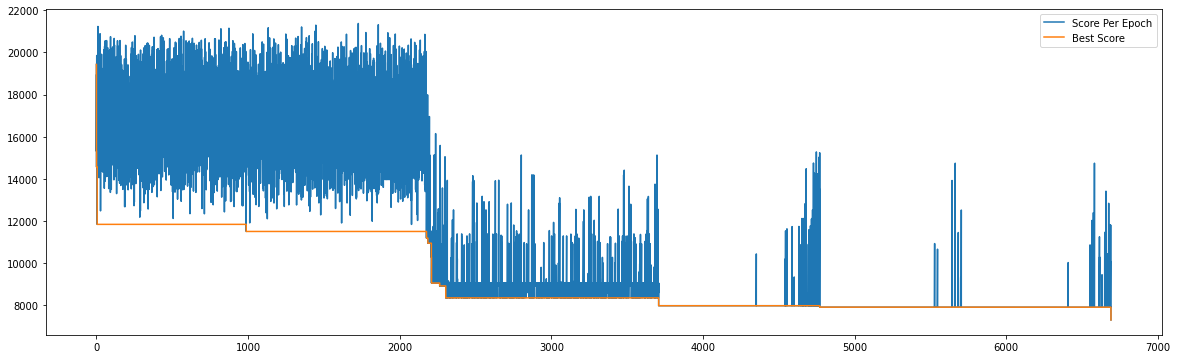

<AxesSubplot: >

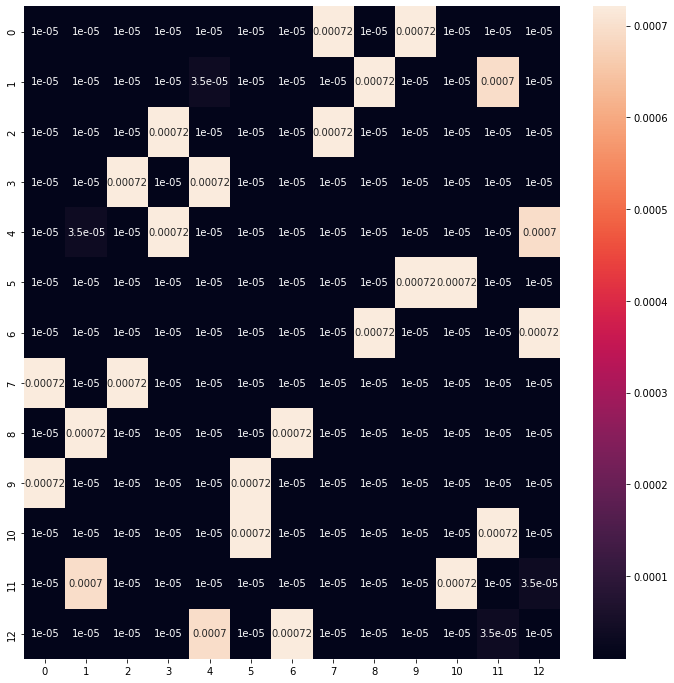

In [449]:
plt.figure(figsize=(20,6))
plt.plot(ploting_data['score_per_epoch']['x'], ploting_data['score_per_epoch']['y'], label = 'Score Per Epoch')
plt.plot(ploting_data['best_score']['x'], ploting_data['best_score']['y'], label = 'Best Score')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
sns.heatmap(pheromone_matrix, annot = True)
